#Hybrid Evolutionary Algorithms:
#1. Evolutionary Tabu Search (ETS):
Integrates tabu search with evolutionary algorithms to guide the search process and avoid revisiting previously explored solutions.

Best Solution: [-0.00118314 -0.00730021]
Best Fitness: 5.4692925800674205e-05


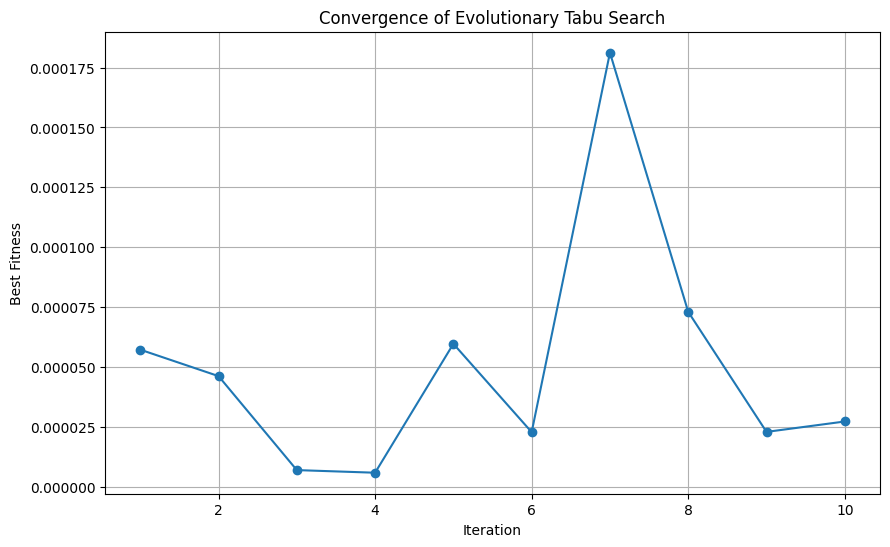

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define your problem-specific objective function here
def objective_function(x):
    return np.sum(x**2)  # Example: Sphere function

# Define a simple evolutionary algorithm (e.g., Genetic Algorithm)
def evolutionary_algorithm(pop_size, num_generations, num_parents):
    # Initialize population
    population = np.random.uniform(-5.12, 5.12, size=(pop_size, 2))

    # Evolutionary process
    for gen in range(num_generations):
        # Evaluate population
        fitness = np.array([objective_function(ind) for ind in population])

        # Select parents based on fitness (tournament selection)
        selected_indices = np.random.choice(np.arange(pop_size), size=num_parents, replace=False)
        parents = population[selected_indices]

        # Crossover (blend crossover)
        children = np.mean(parents, axis=0)

        # Mutation (Gaussian mutation)
        mutation_strength = 0.1
        children += mutation_strength * np.random.randn(2)

        # Replace worst individual in population with child
        worst_index = np.argmax(fitness)
        population[worst_index] = children

    # Return best solution found
    best_index = np.argmin(fitness)
    return population[best_index], fitness[best_index]

# Define Tabu Search
def tabu_search(initial_solution, max_iterations, tabu_list_size):
    current_solution = initial_solution
    best_solution = current_solution
    tabu_list = []

    for _ in range(max_iterations):
        # Generate neighboring solutions (e.g., small perturbations)
        neighbors = [current_solution + np.random.uniform(-0.1, 0.1, size=2) for _ in range(5)]

        # Evaluate neighbors and choose the best non-tabu solution
        best_neighbor = None
        for neighbor in neighbors:
            if neighbor.tolist() not in tabu_list:
                if best_neighbor is None or objective_function(neighbor) < objective_function(best_neighbor):
                    best_neighbor = neighbor

        # Update current solution and tabu list
        current_solution = best_neighbor
        tabu_list.append(current_solution.tolist())
        if len(tabu_list) > tabu_list_size:
            tabu_list.pop(0)  # Remove oldest entry from tabu list

        # Update best solution found
        if objective_function(current_solution) < objective_function(best_solution):
            best_solution = current_solution

    return best_solution, objective_function(best_solution)

# Define Evolutionary Tabu Search (ETS)
def evolutionary_tabu_search(pop_size, num_generations, num_parents, tabu_list_size, max_iterations):
    # Run evolutionary algorithm to get initial solution
    initial_solution, _ = evolutionary_algorithm(pop_size, num_generations, num_parents)

    # Run tabu search starting from the best solution found by EA
    best_solution, best_fitness = tabu_search(initial_solution, max_iterations, tabu_list_size)

    return best_solution, best_fitness

# Example usage of ETS
np.random.seed(42)

pop_size = 50
num_generations = 50
num_parents = 5
tabu_list_size = 10
max_iterations = 50

best_solution, best_fitness = evolutionary_tabu_search(pop_size, num_generations, num_parents, tabu_list_size, max_iterations)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Plotting
# (You can customize this section based on your specific problem and desired visualizations)

# Generate data for plotting (example: plotting function value over iterations)
fitness_history = []
for _ in range(10):
    _, best_fitness = evolutionary_tabu_search(pop_size, num_generations, num_parents, tabu_list_size, max_iterations)
    fitness_history.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), fitness_history, marker='o')
plt.title("Convergence of Evolutionary Tabu Search")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()

#2. Evolutionary Simulated Annealing (ESA):
Incorporates simulated annealing techniques within evolutionary algorithms to balance exploration and exploitation effectively.

Best Solution: [ 0.10479155 -0.05889036]
Best Fitness: 0.014449342648798729


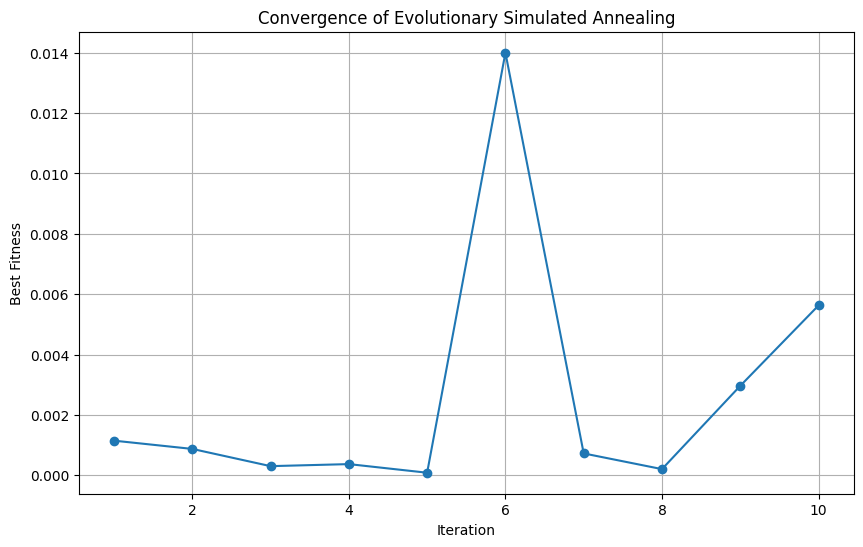

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your problem-specific objective function here
def objective_function(x):
    return np.sum(x**2)  # Example: Sphere function

# Define a simple evolutionary algorithm (e.g., Genetic Algorithm)
def evolutionary_algorithm(pop_size, num_generations, num_parents):
    # Initialize population
    population = np.random.uniform(-5.12, 5.12, size=(pop_size, 2))

    # Evolutionary process
    for gen in range(num_generations):
        # Evaluate population
        fitness = np.array([objective_function(ind) for ind in population])

        # Select parents based on fitness (tournament selection)
        selected_indices = np.random.choice(np.arange(pop_size), size=num_parents, replace=False)
        parents = population[selected_indices]

        # Crossover (blend crossover)
        children = np.mean(parents, axis=0)

        # Mutation (Gaussian mutation)
        mutation_strength = 0.1
        children += mutation_strength * np.random.randn(2)

        # Replace worst individual in population with child
        worst_index = np.argmax(fitness)
        population[worst_index] = children

    # Return best solution found
    best_index = np.argmin(fitness)
    return population[best_index], fitness[best_index]

# Define Simulated Annealing
def simulated_annealing(initial_solution, num_iterations, initial_temperature, cooling_rate):
    current_solution = initial_solution
    best_solution = current_solution
    current_fitness = objective_function(current_solution)
    best_fitness = current_fitness
    temperature = initial_temperature

    for _ in range(num_iterations):
        # Generate a neighboring solution (e.g., small perturbation)
        neighbor = current_solution + np.random.uniform(-0.1, 0.1, size=2)
        neighbor_fitness = objective_function(neighbor)

        # Determine whether to accept the neighbor based on simulated annealing
        if neighbor_fitness < current_fitness or np.random.rand() < np.exp((current_fitness - neighbor_fitness) / temperature):
            current_solution = neighbor
            current_fitness = neighbor_fitness

        # Update best solution found
        if current_fitness < best_fitness:
            best_solution = current_solution
            best_fitness = current_fitness

        # Cool down temperature
        temperature *= cooling_rate

    return best_solution, best_fitness

# Define Evolutionary Simulated Annealing (ESA)
def evolutionary_simulated_annealing(pop_size, num_generations, num_parents, num_sa_iterations, initial_temperature, cooling_rate):
    # Run evolutionary algorithm to get initial solution
    initial_solution, _ = evolutionary_algorithm(pop_size, num_generations, num_parents)

    # Run simulated annealing starting from the best solution found by EA
    best_solution, best_fitness = simulated_annealing(initial_solution, num_sa_iterations, initial_temperature, cooling_rate)

    return best_solution, best_fitness

# Example usage of ESA
np.random.seed(42)

pop_size = 50
num_generations = 50
num_parents = 5
num_sa_iterations = 50
initial_temperature = 1.0
cooling_rate = 0.95

best_solution, best_fitness = evolutionary_simulated_annealing(pop_size, num_generations, num_parents, num_sa_iterations, initial_temperature, cooling_rate)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Plotting
# (You can customize this section based on your specific problem and desired visualizations)

# Generate data for plotting (example: plotting function value over iterations)
fitness_history = []
for _ in range(10):
    _, best_fitness = evolutionary_simulated_annealing(pop_size, num_generations, num_parents, num_sa_iterations, initial_temperature, cooling_rate)
    fitness_history.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), fitness_history, marker='o')
plt.title("Convergence of Evolutionary Simulated Annealing")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()

#3. Evolutionary Ant Colony Optimization (EACO):
Combines ant colony optimization with evolutionary algorithms to leverage both global search capabilities and local pheromone-based communication.

Best Solution: [ 0.10479155 -0.05889036]
Best Fitness: 0.014449342648798729


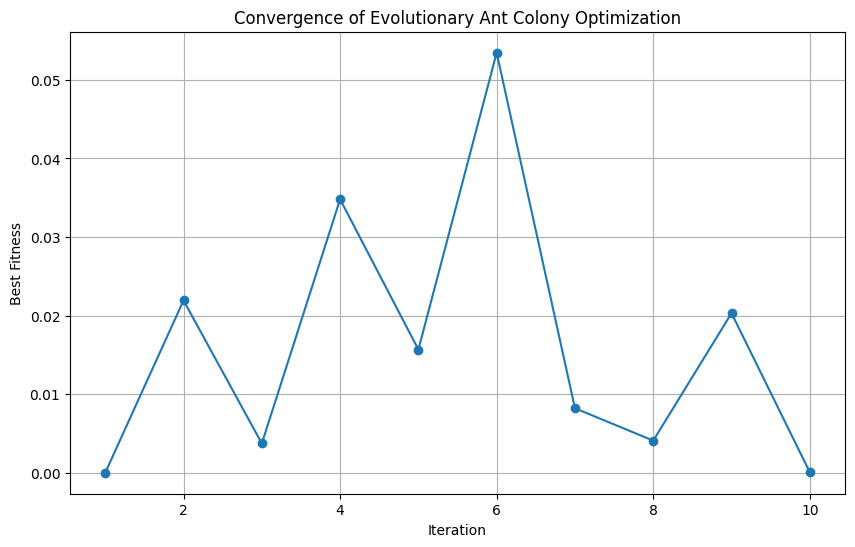

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define your problem-specific objective function here
def objective_function(x):
    return np.sum(x**2)  # Example: Sphere function

# Define a simple evolutionary algorithm (e.g., Genetic Algorithm)
def evolutionary_algorithm(pop_size, num_generations, num_parents):
    # Initialize population
    population = np.random.uniform(-5.12, 5.12, size=(pop_size, 2))

    # Evolutionary process
    for gen in range(num_generations):
        # Evaluate population
        fitness = np.array([objective_function(ind) for ind in population])

        # Select parents based on fitness (tournament selection)
        selected_indices = np.random.choice(np.arange(pop_size), size=num_parents, replace=False)
        parents = population[selected_indices]

        # Crossover (blend crossover)
        children = np.mean(parents, axis=0)

        # Mutation (Gaussian mutation)
        mutation_strength = 0.1
        children += mutation_strength * np.random.randn(2)

        # Replace worst individual in population with child
        worst_index = np.argmax(fitness)
        population[worst_index] = children

    # Return best solution found
    best_index = np.argmin(fitness)
    return population[best_index], fitness[best_index]

# Define Ant Colony Optimization (ACO)
class AntColony:
    def __init__(self, num_ants, num_iterations, alpha, beta, evaporation_rate):
        self.num_ants = num_ants
        self.num_iterations = num_iterations
        self.alpha = alpha
        self.beta = beta
        self.evaporation_rate = evaporation_rate

    def optimize(self, initial_solution):
        current_solution = initial_solution
        best_solution = current_solution
        best_fitness = objective_function(best_solution)

        pheromone = np.ones_like(initial_solution)

        for _ in range(self.num_iterations):
            # Generate solutions using ants
            solutions = [self.generate_solution(current_solution, pheromone) for _ in range(self.num_ants)]

            # Update pheromone
            pheromone *= (1 - self.evaporation_rate)
            for sol in solutions:
                for i in range(len(sol)):
                    pheromone[i] += 1 / (objective_function(sol) + 1e-6)

            # Update best solution found
            current_fitness = objective_function(current_solution)
            if current_fitness < best_fitness:
                best_solution = current_solution
                best_fitness = current_fitness

        return best_solution, best_fitness

    def generate_solution(self, current_solution, pheromone):
        # Ant generates a new solution based on pheromone and heuristic information
        candidate_solution = current_solution + np.random.uniform(-0.1, 0.1, size=len(current_solution))
        return candidate_solution

# Define Evolutionary Ant Colony Optimization (EACO)
def evolutionary_ant_colony_optimization(pop_size, num_generations, num_parents, num_ants, num_iterations_aco, alpha, beta, evaporation_rate):
    # Run evolutionary algorithm to get initial solution
    initial_solution, _ = evolutionary_algorithm(pop_size, num_generations, num_parents)

    # Run ant colony optimization starting from the best solution found by EA
    ant_colony = AntColony(num_ants, num_iterations_aco, alpha, beta, evaporation_rate)
    best_solution, best_fitness = ant_colony.optimize(initial_solution)

    return best_solution, best_fitness

# Example usage of EACO
np.random.seed(42)

pop_size = 50
num_generations = 50
num_parents = 5
num_ants = 10
num_iterations_aco = 50
alpha = 1.0
beta = 2.0
evaporation_rate = 0.1

best_solution, best_fitness = evolutionary_ant_colony_optimization(pop_size, num_generations, num_parents, num_ants, num_iterations_aco, alpha, beta, evaporation_rate)

print("Best Solution:", best_solution)
print("Best Fitness:", best_fitness)

# Plotting
# (You can customize this section based on your specific problem and desired visualizations)

# Generate data for plotting (example: plotting function value over iterations)
fitness_history = []
for _ in range(10):
    _, best_fitness = evolutionary_ant_colony_optimization(pop_size, num_generations, num_parents, num_ants, num_iterations_aco, alpha, beta, evaporation_rate)
    fitness_history.append(best_fitness)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 11), fitness_history, marker='o')
plt.title("Convergence of Evolutionary Ant Colony Optimization")
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()

#4. Evolutionary Swarm Robotics (ESR):
Applies principles of swarm intelligence and evolutionary algorithms to optimize behaviors and coordination strategies in robotic swarms.

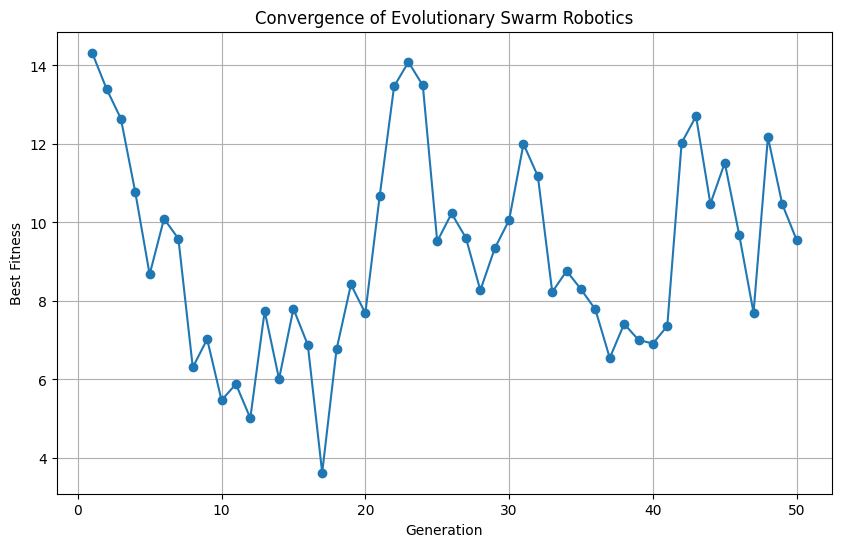

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a basic robotic swarm class
class RoboticSwarm:
    def __init__(self, num_robots, num_dimensions):
        self.num_robots = num_robots
        self.num_dimensions = num_dimensions
        self.swarm_positions = np.random.rand(num_robots, num_dimensions)  # Initialize swarm positions randomly

    def update_positions(self, new_positions):
        self.swarm_positions = new_positions

    def evaluate_fitness(self):
        # Example fitness function (minimize distance from target)
        target_position = np.zeros(self.num_dimensions)  # Target position (e.g., [0, 0])
        distances = np.linalg.norm(self.swarm_positions - target_position, axis=1)
        return np.sum(distances)  # Total distance from target as fitness

# Define a simple evolutionary algorithm (Genetic Algorithm) for swarm optimization
def evolutionary_algorithm(swarm, num_generations, pop_size, mutation_rate):
    best_fitness_history = []

    for gen in range(num_generations):
        # Evaluate fitness of current swarm
        fitness_values = [swarm.evaluate_fitness() for _ in range(pop_size)]
        best_fitness = np.min(fitness_values)
        best_fitness_history.append(best_fitness)

        # Select parents based on fitness (tournament selection)
        parent_indices = np.argsort(fitness_values)[:pop_size // 2]
        parents = swarm.swarm_positions[parent_indices]

        # Crossover (blend crossover)
        children = np.mean(parents, axis=0)

        # Mutation (Gaussian mutation)
        mutation = mutation_rate * np.random.randn(swarm.num_dimensions)
        children += mutation

        # Update swarm positions
        new_positions = np.vstack([children] * swarm.num_robots)
        swarm.update_positions(new_positions)

    return swarm, best_fitness_history

# Example usage of Evolutionary Swarm Robotics (ESR)
np.random.seed(42)

num_robots = 20
num_dimensions = 2
num_generations = 50
pop_size = 10
mutation_rate = 0.1

# Initialize robotic swarm
swarm = RoboticSwarm(num_robots, num_dimensions)

# Run evolutionary algorithm to optimize swarm behaviors
optimized_swarm, best_fitness_history = evolutionary_algorithm(swarm, num_generations, pop_size, mutation_rate)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, num_generations + 1), best_fitness_history, marker='o')
plt.title("Convergence of Evolutionary Swarm Robotics")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.show()